In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

In [7]:
train_df = pd.concat((pd.read_csv('/Users/joel/Downloads/N/Output/NotEncoded_Genres_ArtistsEncoded/p%ofgenre/Train.csv'), pd.read_csv('/Users/joel/Downloads/N/Output/NotEncoded_Genres_ArtistsEncoded/p%ofgenre/Test.csv')))

In [8]:
X_train = train_df.drop(columns=['genres'])
y_train = train_df['genres']

In [9]:
# Classification problem requires validation and test set, clustering does not
# We use a 60-20-20 split for classification, and all of the data for clustering

In [10]:
X_train

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count,Artists_encoded
0,0.105555,0.751000,269446.500000,0.584500,0.218021,0.081650,-8.306000,0.040900,112.381000,0.600000,43.000000,6,1,4,9359
1,0.725067,0.457767,239785.333333,0.277103,0.030174,0.208637,-15.235200,0.037757,105.660500,0.428367,40.300000,7,1,60,2346
2,0.098400,0.715333,235249.000000,0.726333,0.000025,0.088500,-4.912167,0.166733,107.788500,0.755167,50.000000,8,0,12,340
3,0.002519,0.524000,195159.090909,0.840727,0.000042,0.202082,-4.500000,0.058827,146.569182,0.724455,53.909091,2,1,22,1144
4,0.028850,0.567000,177192.000000,0.664000,0.000000,0.427000,-5.937000,0.032050,88.241000,0.653500,62.000000,6,1,4,2377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5099,0.101934,0.430107,259529.500000,0.847857,0.044574,0.208654,-7.677607,0.075150,128.126393,0.504286,36.178571,11,1,56,6642
5100,0.041400,0.396000,250200.000000,0.937000,0.000606,0.898000,-6.707000,0.107000,131.407000,0.166000,35.000000,5,1,2,577
5101,0.885286,0.492000,252011.285714,0.269571,0.000209,0.134043,-10.270143,0.044457,128.523286,0.199000,41.285714,5,1,7,6830
5102,0.988783,0.346043,241089.826087,0.035973,0.814087,0.081209,-30.536739,0.044339,116.348522,0.192104,35.869565,1,1,23,5460


In [11]:
artists_encoded_train = X_train[['Artists_encoded','key','mode']]
X_train = X_train.drop(columns=['Artists_encoded','key','mode'])

In [12]:
X_train

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,count
0,0.105555,0.751000,269446.500000,0.584500,0.218021,0.081650,-8.306000,0.040900,112.381000,0.600000,43.000000,4
1,0.725067,0.457767,239785.333333,0.277103,0.030174,0.208637,-15.235200,0.037757,105.660500,0.428367,40.300000,60
2,0.098400,0.715333,235249.000000,0.726333,0.000025,0.088500,-4.912167,0.166733,107.788500,0.755167,50.000000,12
3,0.002519,0.524000,195159.090909,0.840727,0.000042,0.202082,-4.500000,0.058827,146.569182,0.724455,53.909091,22
4,0.028850,0.567000,177192.000000,0.664000,0.000000,0.427000,-5.937000,0.032050,88.241000,0.653500,62.000000,4
...,...,...,...,...,...,...,...,...,...,...,...,...
5099,0.101934,0.430107,259529.500000,0.847857,0.044574,0.208654,-7.677607,0.075150,128.126393,0.504286,36.178571,56
5100,0.041400,0.396000,250200.000000,0.937000,0.000606,0.898000,-6.707000,0.107000,131.407000,0.166000,35.000000,2
5101,0.885286,0.492000,252011.285714,0.269571,0.000209,0.134043,-10.270143,0.044457,128.523286,0.199000,41.285714,7
5102,0.988783,0.346043,241089.826087,0.035973,0.814087,0.081209,-30.536739,0.044339,116.348522,0.192104,35.869565,23


In [13]:
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)

In [14]:
X_train_scaled.isna().sum()

acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
count               0
dtype: int64

In [15]:
artists_encoded_train = artists_encoded_train.reset_index(drop=True)

X_train_scaled[['Artists_encoded','key','mode']] = artists_encoded_train

print("Training set shape:", X_train_scaled.shape, y_train.shape)

Training set shape: (25518, 15) (25518,)


In [16]:
X_train_scaled

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,count,Artists_encoded,key,mode
0,-0.745887,1.163471,0.346573,-0.087186,0.716699,-1.099484,0.176418,-0.578558,-0.395873,0.272581,-0.114368,-0.425409,9359,6,1
1,1.540217,-0.959552,-0.084593,-1.665711,-0.301222,0.177791,-1.551268,-0.618749,-0.766750,-0.658335,-0.298880,0.326587,2346,7,1
2,-0.772290,0.905243,-0.150534,0.641148,-0.464599,-1.030584,1.022616,1.030320,-0.649314,1.114184,0.363995,-0.317981,340,8,0
3,-1.126107,-0.480020,-0.733296,1.228577,-0.464503,0.111860,1.125383,-0.349344,1.490834,0.947606,0.631132,-0.183696,1144,2,1
4,-1.028941,-0.168698,-0.994472,0.321058,-0.464733,2.374164,0.767090,-0.691713,-1.728061,0.562758,1.184046,-0.425409,2377,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25513,-0.759250,-1.159808,0.202416,1.265190,-0.223192,0.177961,0.333097,-0.140645,0.473051,-0.246560,-0.580528,0.272873,6642,11,1
25514,-0.982629,-1.406746,0.066799,1.722952,-0.461449,7.111641,0.575103,0.266582,0.654095,-2.081376,-0.661069,-0.452266,577,5,1
25515,2.131452,-0.711701,0.093128,-1.704389,-0.463602,-0.572498,-0.313310,-0.533078,0.494954,-1.902388,-0.231519,-0.385124,6830,5,1
25516,2.513373,-1.768433,-0.065630,-2.903949,3.946719,-1.103922,-5.366462,-0.534586,-0.176921,-1.939789,-0.601645,-0.170267,5460,1,1


In [17]:
X_train_scaled.isna().sum()

acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
count               0
Artists_encoded     0
key                 0
mode                0
dtype: int64

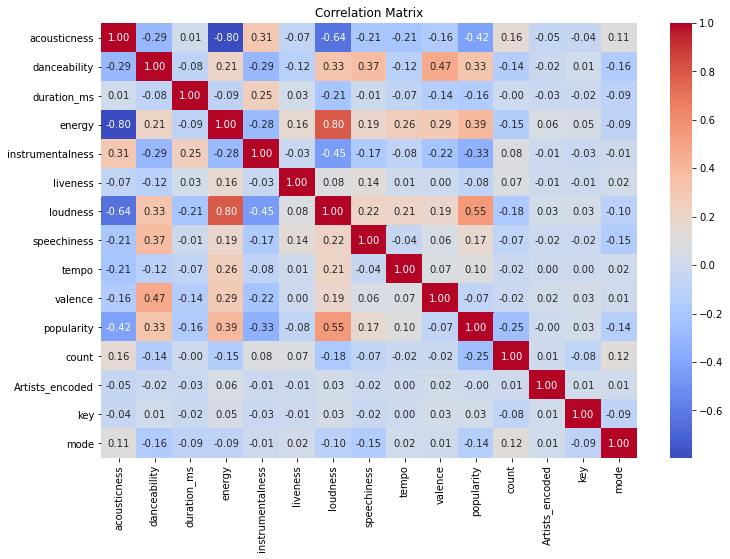

In [18]:
corr_matrix = X_train_scaled.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [19]:
corr_matrix = X_train_scaled.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.75)]
X_selected = X_train_scaled.drop(columns=to_drop)
X_selected

<ipython-input-19-4fcf1223239f>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


,acousticness,danceability,duration_ms,instrumentalness,liveness,speechiness,tempo,valence,popularity,count,Artists_encoded,key,mode
0,-0.745887,1.163471,0.346573,0.716699,-1.099484,-0.578558,-0.395873,0.272581,-0.114368,-0.425409,9359,6,1
1,1.540217,-0.959552,-0.084593,-0.301222,0.177791,-0.618749,-0.766750,-0.658335,-0.298880,0.326587,2346,7,1
2,-0.772290,0.905243,-0.150534,-0.464599,-1.030584,1.030320,-0.649314,1.114184,0.363995,-0.317981,340,8,0
3,-1.126107,-0.480020,-0.733296,-0.464503,0.111860,-0.349344,1.490834,0.947606,0.631132,-0.183696,1144,2,1
4,-1.028941,-0.168698,-0.994472,-0.464733,2.374164,-0.691713,-1.728061,0.562758,1.184046,-0.425409,2377,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25513,-0.759250,-1.159808,0.202416,-0.223192,0.177961,-0.140645,0.473051,-0.246560,-0.580528,0.272873,6642,11,1
25514,-0.982629,-1.406746,0.066799,-0.461449,7.111641,0.266582,0.654095,-2.081376,-0.661069,-0.452266,577,5,1
25515,2.131452,-0.711701,0.093128,-0.463602,-0.572498,-0.533078,0.494954,-1.902388,-0.231519,-0.385124,6830,5,1
25516,2.513373,-1.768433,-0.065630,3.946719,-1.103922,-0.534586,-0.176921,-1.939789,-0.601645,-0.170267,5460,1,1


In [20]:
from sklearn.ensemble import RandomForestClassifier


rf_model = RandomForestClassifier()
rf_model.fit(X_train_scaled, y_train)

feature_importance = rf_model.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X_train_scaled.columns, 'Importance': feature_importance})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("Top Features Selected by Random Forest:")
print(feature_importance_df)

Top Features Selected by Random Forest:
             Feature  Importance
10        popularity    0.083909
0       acousticness    0.082525
7        speechiness    0.081961
2        duration_ms    0.080670
1       danceability    0.080460
9            valence    0.076049
6           loudness    0.073903
3             energy    0.073445
4   instrumentalness    0.069169
8              tempo    0.064074
5           liveness    0.062169
12   Artists_encoded    0.061058
11             count    0.056832
13               key    0.042536
14              mode    0.011239


In [21]:
X_train_scaled1 = X_train_scaled.drop(columns=['mode','energy'])

In [22]:
X_train_scaled1

,acousticness,danceability,duration_ms,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,count,Artists_encoded,key
0,-0.745887,1.163471,0.346573,0.716699,-1.099484,0.176418,-0.578558,-0.395873,0.272581,-0.114368,-0.425409,9359,6
1,1.540217,-0.959552,-0.084593,-0.301222,0.177791,-1.551268,-0.618749,-0.766750,-0.658335,-0.298880,0.326587,2346,7
2,-0.772290,0.905243,-0.150534,-0.464599,-1.030584,1.022616,1.030320,-0.649314,1.114184,0.363995,-0.317981,340,8
3,-1.126107,-0.480020,-0.733296,-0.464503,0.111860,1.125383,-0.349344,1.490834,0.947606,0.631132,-0.183696,1144,2
4,-1.028941,-0.168698,-0.994472,-0.464733,2.374164,0.767090,-0.691713,-1.728061,0.562758,1.184046,-0.425409,2377,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25513,-0.759250,-1.159808,0.202416,-0.223192,0.177961,0.333097,-0.140645,0.473051,-0.246560,-0.580528,0.272873,6642,11
25514,-0.982629,-1.406746,0.066799,-0.461449,7.111641,0.575103,0.266582,0.654095,-2.081376,-0.661069,-0.452266,577,5
25515,2.131452,-0.711701,0.093128,-0.463602,-0.572498,-0.313310,-0.533078,0.494954,-1.902388,-0.231519,-0.385124,6830,5
25516,2.513373,-1.768433,-0.065630,3.946719,-1.103922,-5.366462,-0.534586,-0.176921,-1.939789,-0.601645,-0.170267,5460,1


In [24]:
from sklearn.cluster import KMeans

# Choose the number of clusters (K)
# We are choosing 100 classifiers because we know that our labelled data truly falls into 100 unique genres
n_clusters = 100

# Fit the KMeans model on the scaled data
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_train_scaled1)

# Predict cluster labels
train_labels = kmeans.predict(X_train_scaled1)

# Analyze results
# For example, you can check the size of each cluster
print("Cluster counts in training data:")
print(pd.Series(train_labels).value_counts())

# You can also examine the cluster centers
print("Cluster centers:")
print(kmeans.cluster_centers_)

# Add cluster labels to your DataFrame
X_train_scaled1['Cluster'] = train_labels

Cluster counts in training data:
66    385
59    362
69    324
86    323
54    319
     ... 
9     194
16    190
47    180
10    168
89    152
Length: 100, dtype: int64
Cluster centers:
[[-5.31910748e-01  3.22577221e-01 -1.70497432e-01 ...  4.74014337e+01
   4.24731183e+00  5.30000000e+01]
 [-2.83095208e-01 -9.12359745e-02 -8.68212054e-02 ...  5.78184716e+03
   5.41048035e+00  2.60000000e+01]
 [ 3.15430636e-02 -2.67166937e-01  2.12667435e-01 ...  7.70413043e+03
   5.26086957e+00  6.00000000e+00]
 ...
 [-9.06779676e-02  5.97873457e-02 -4.12126118e-02 ...  6.88667647e+03
   4.76470588e+00  4.40000000e+01]
 [-5.57477418e-02  4.00053782e-02 -5.17206593e-02 ...  3.08464599e+03
   5.71532847e+00  7.30000000e+01]
 [-2.17270865e-02  8.64059886e-02  3.02380387e-02 ...  9.29251037e+03
   5.23236515e+00  1.10000000e+01]]
